## MACHINE LEARNING PROJECT

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# Model construction and evaluation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Ensembles
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Data Exploration

In [31]:
# Load dataset
df_train_raw = pd.read_csv('train.csv')
df_train_raw.head()

,Unnamed: 0,id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,0,261358,Y. Sylla,Youssuf Sylla,ST,58,76,525000.0,952.712115,18,...,43,13,19,17,7,6,8,10,7,NaN
1,1,252435,J. Austerfield,Josh Austerfield,"CM, CDM",55,75,350000.0,902.232819,19,...,48,40,48,45,14,8,5,14,11,NaN
2,2,248723,C. Malley,Connor Malley,"CAM, CM",53,66,230000.0,2873.818374,21,...,52,26,23,31,14,8,13,9,6,NaN
3,3,251157,Lee Gwang Yeon,이광연 Gwang Yeon Lee,GK,60,71,475000.0,678.608124,21,...,26,8,14,12,60,60,54,63,61,23.0
4,4,205393,J. Baldwin,Jack Baldwin,CB,63,65,475000.0,1911.674228,28,...,67,62,63,62,11,12,6,11,14,NaN


In [130]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15391 entries, 0 to 15390
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   15391 non-null  int64  
 1   id                           15391 non-null  int64  
 2   short_name                   15391 non-null  object 
 3   long_name                    15391 non-null  object 
 4   player_positions             15391 non-null  object 
 5   overall                      15391 non-null  int64  
 6   potential                    15391 non-null  int64  
 7   value_eur                    15333 non-null  float64
 8   wage_eur                     15342 non-null  float64
 9   age                          15391 non-null  int64  
 10  dob                          15391 non-null  object 
 11  height_cm                    15391 non-null  int64  
 12  weight_kg                    15391 non-null  int64  
 13  club_team_id    

In [132]:
# View missing data
total = df_train_raw.isnull().sum().sort_values(ascending=False)
percent = (df_train_raw.isnull().sum()/df_train_raw.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
nation_jersey_number,14786,0.960691
nation_position,14786,0.960691
club_loaned_from,14515,0.943084
player_tags,14231,0.924631
goalkeeping_speed,13662,0.887662
player_traits,7936,0.515626
physic,1729,0.112338
defending,1729,0.112338
passing,1729,0.112338
shooting,1729,0.112338


In [134]:
df_train_raw['value_eur'].describe()

count    1.533300e+04
mean     2.851328e+06
std      7.528281e+06
min      9.000000e+03
25%      4.750000e+05
50%      9.750000e+05
75%      2.000000e+06
max      1.375000e+08
Name: value_eur, dtype: float64

In [136]:
# View the top 30 highest-valued players
top_30_players = df_train_raw[['short_name', 'player_positions', 'value_eur']].sort_values(by='value_eur', ascending=False).head(30)

print(top_30_players)

                short_name player_positions    value_eur
2278            E. Haaland               ST  137500000.0
14822              H. Kane               ST  129500000.0
8239          K. De Bruyne          CM, CAM  125500000.0
3487            F. de Jong      CM, CDM, CB  119500000.0
8696        R. Lewandowski               ST  119500000.0
6548         G. Donnarumma               GK  119500000.0
5386             J. Sancho       RM, CF, LM  116500000.0
10008  T. Alexander-Arnold               RB  114000000.0
1038              J. Oblak               GK  112000000.0
1303           R. Sterling           LW, RW  107500000.0
7086       Bruno Fernandes              CAM  107500000.0
13872               H. Son       LM, CF, LW  104000000.0
147             Rúben Dias               CB  102500000.0
13448              S. Mané               LW  101000000.0
5640              N. Kanté          CDM, CM  100000000.0
714          M. ter Stegen               GK   99000000.0
12740           K. Havertz     

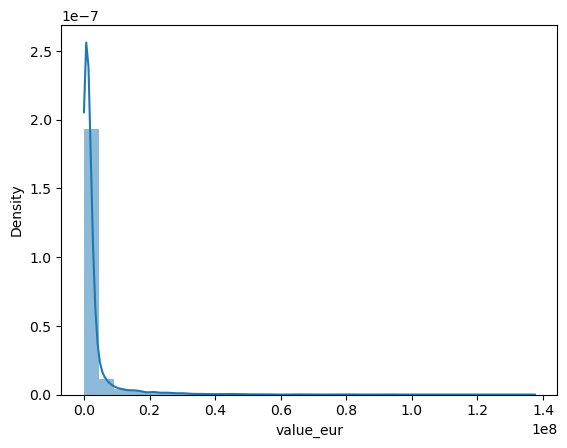

Skewness: 7.800648
Kurtosis: 83.973103


In [138]:
histogram_raw = sns.histplot(df_train_raw['value_eur'], kde=True, bins=30, stat='density', linewidth=0)
plt.show()

print("Skewness: %f" % df_train_raw['value_eur'].skew())
print("Kurtosis: %f" % df_train_raw['value_eur'].kurt())

Heavily right-skewed (most players are valued under a few million € with a few outliers. We will apply a logarithmic transformation of the dataset to reduce the skewness and kurtosis.

We continue to explore df_train_raw and investigate dependence of other variables on "value_eur"

In [142]:
k = 10
corrmat = df_train_raw.select_dtypes(include=['number']).corr()
corrmat = df_train_raw.drop(columns=['Unnamed: 0'], errors='ignore').corr(numeric_only=True)
collumns_k_corr = corrmat["value_eur"].sort_values(ascending = False)[:11].index

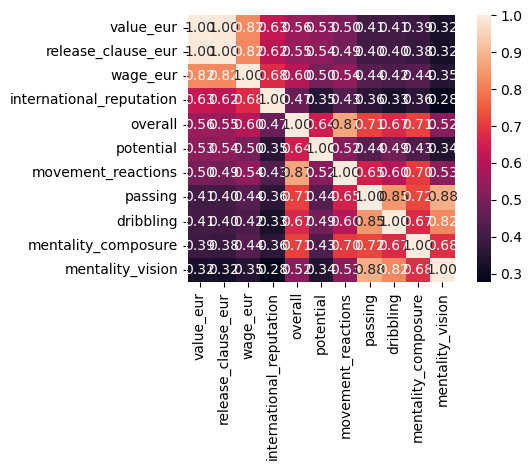

In [144]:
reduced_corrmat = df_train_raw[collumns_k_corr].corr()
corr_heatmap_10 = sns.heatmap(reduced_corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.tight_layout()
plt.show()

*NOTES*: It appears that value_eur and release_clause_eur are identical, so it is best to remove release_clause_eur from the model. Additionally, value_eur and wage_eur are highly correlated. I am leaning towards removing wage_eur from the model as well to investigate the effects of the other variables on value_eur; it is too obvious that a higher wage implies a higher value.

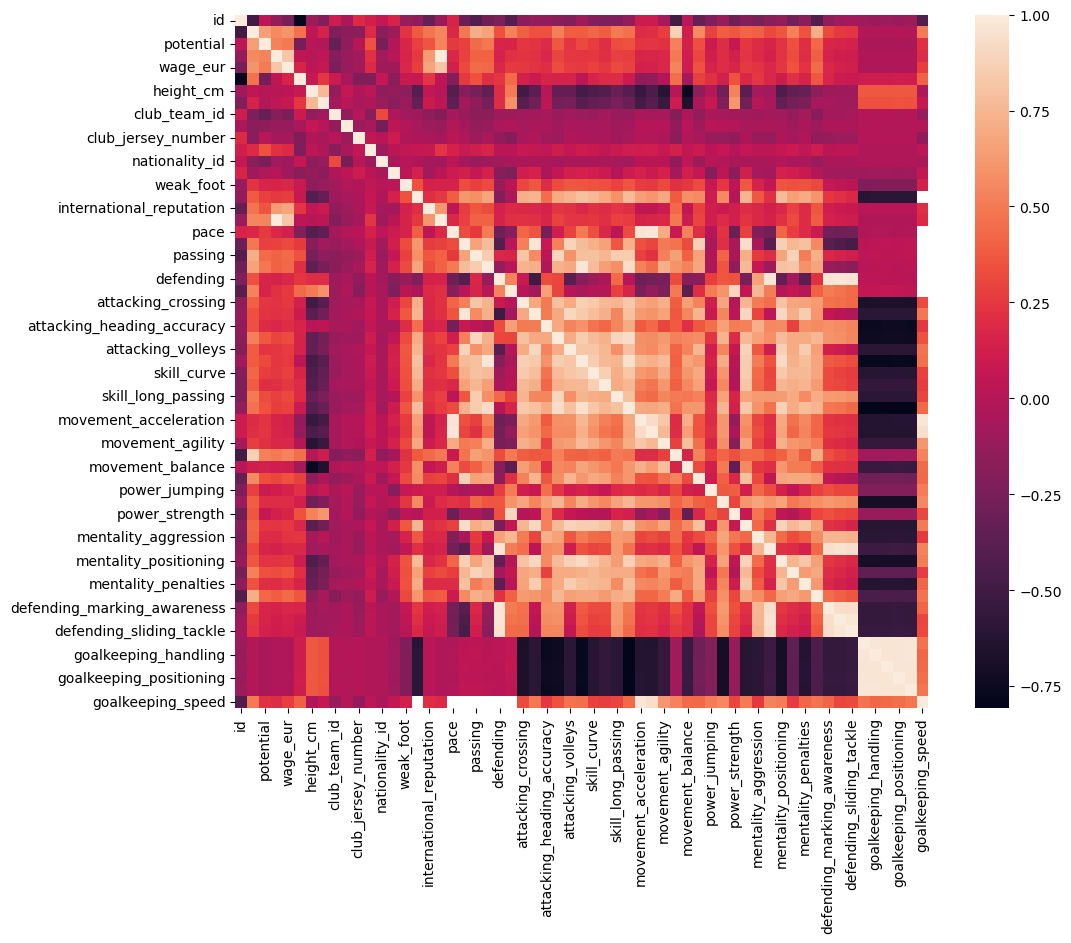

In [147]:
f, ax = plt.subplots(figsize=(12, 9))
corr_heatmap_all = sns.heatmap(corrmat, vmax=1.0, square=True)
plt.savefig("correlation_heatmap_all.png", dpi=300, bbox_inches='tight')
plt.show()

In [151]:
# Get correlations with 'value_eur', drop self-correlation
value_corr = corrmat['value_eur'].drop('value_eur')

# Get correlations with 'value_eur', sort descending, and exclude self-correlation
top_corr = value_corr.sort_values(ascending=False)

# Display top 10
print("Top 10 features most positively correlated with value_eur:\n")
print(top_corr.head(10).to_string())

Top 10 features most positively correlated with value_eur:

release_clause_eur          0.995313
wage_eur                    0.823054
international_reputation    0.632083
overall                     0.558455
potential                   0.528645
movement_reactions          0.497302
passing                     0.406285
dribbling                   0.405900
mentality_composure         0.392885
mentality_vision            0.324678


*Variables Positively Correlated with value_eur*

These are features that tend to increase as player value increases, showing a lighter (white or pale pink) color where they intersect with value_eur.
1. release_clause_eur – High correlation, likely because this represents a monetary estimate tied to the player's market value.
2. wage_eur - High correlation, intuitive
3. overall, potential – This is strongly correlated with value_eur, which makes sense because better-rated players are more valuable.

In [154]:
# Get features with correlation closest to 0 (least correlated)
least_corr = value_corr.abs().sort_values().index
print("10 features least correlated with value_eur:\n")
print(value_corr.loc[least_corr].head(10).to_string())

10 features least correlated with value_eur:

nation_jersey_number       0.008333
height_cm                  0.015614
goalkeeping_reflexes      -0.020494
goalkeeping_kicking       -0.022064
goalkeeping_positioning   -0.022796
goalkeeping_handling      -0.022864
goalkeeping_diving        -0.023647
weight_kg                  0.042930
age                        0.044749
club_jersey_number        -0.066140


*Variables Negatively or Weakly Correlated with value_eur*

These variables have low or negative influence on value_eur.
1. goalkeeping attributes (e.g., goalkeeping_diving, goalkeeping_kicking, goalkeeping_reflexes) – These show very weak or even negative correlation, unless the player is a goalkeeper. (Since dataset includes mostly outfield players, this is expected.)
2. defending_standing_tackle, mentality_interceptions – These might have weak correlations, particularly if defensive players are underrepresented in top value tiers.
3. nation_jersey_number, club_contract_valid_until – Metadata like jersey number and contract year have little predictive value for value_eur.

Now, we will investigate high correlation between variables to identify *multicollinearity*

In [158]:
# Unstack to long format and drop duplicate/self-correlations
corr_pairs = corrmat.abs().unstack()
corr_pairs = corr_pairs[corr_pairs < 1.0]  # remove self-correlations (1.0)
corr_pairs = corr_pairs.drop_duplicates().sort_values(ascending=False)

# Show top 50 most correlated variable pairs
print("Top 50 most highly correlated variable pairs:\n")
print(corr_pairs.head(50).to_string())

Top 50 most highly correlated variable pairs:

value_eur                    release_clause_eur             0.995313
defending                    defending_standing_tackle      0.977567
defending_standing_tackle    defending_sliding_tackle       0.977385
goalkeeping_diving           goalkeeping_reflexes           0.974085
movement_acceleration        goalkeeping_speed              0.972827
dribbling                    skill_dribbling                0.972269
pace                         movement_sprint_speed          0.972190
goalkeeping_handling         goalkeeping_reflexes           0.972159
goalkeeping_diving           goalkeeping_handling           0.971964
                             goalkeeping_positioning        0.971657
goalkeeping_positioning      goalkeeping_reflexes           0.971626
goalkeeping_handling         goalkeeping_positioning        0.971040
goalkeeping_kicking          goalkeeping_reflexes           0.969005
goalkeeping_diving           goalkeeping_kicking        

Multicollinearity can destabilize linear models like OLS regression. When predictors are strongly correlated, it becomes difficult to isolate their individual effects, leading to inflated standard errors and unreliable coefficient estimates. This undermines interpretability and may cause overfitting.

Discuss the impact of multicollinearity on predictions/MSE. How can regularization address multicollinearity in OLS? What other models are good at minimizing multicollinearity (Hint: RF!).

## Data Preprocessing

We perform several preprocessing steps:

*Perform logarithmic tranformation*: After performing a logarithmic transformation on the data, we will reduce the skewness and kurtosis of the data. This will transform our dataset such that it is more similar to a Gaussian distribution, which will improve the performance of our learning model. For reference, the non-log-transformed OLS model yielded an RMSE of €1,411,729.78.

*Drop irrelevant or textual columns*: Columns such as Unnamed: 0, id, short_name, long_name, and any textual or high-cardinality IDs (club names, club IDs, player tags/traits, nationality name/id, etc.) are removed, as they cannot be directly used in a linear model and often have many unique values.

*Handle missing values*: We drop any rows still missing the target value_eur, and any rows missing other critical features like league_level or wage_eur. We impute release_clause_eur missing values with 0 (assuming no release clause) and fill any remaining numeric gaps (very few) with median values or drop rows if necessary.

*Handle correlated data*: We DO NOT remove highly correlated variables from the dataset; we will apply ridge regularization methods to address multicollinearity in OLS.

*Convert categorical features*: The remaining categorical columns are preferred_foot, work_rate, and body_type. We convert these to one-hot encoded columns (binary dummies). For example, preferred_foot is turned into a binary 0/1 feature (e.g. Right vs. Left), and each unique category in work_rate and body_type becomes a separate column.

*Partition dataset*: Because our single dataset contains many values that are unique according to whether a player is an outfielder or a goalkeeper (GK), we split the data into two subsets (that are present already in the data; we do not need to learn the classes).

The resulting cleaned dataset has all numeric features and no missing values!

*Logarithmic Transformation of Data*

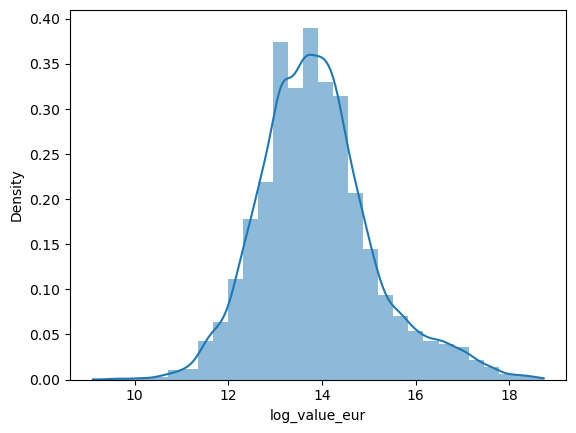

Skewness: 0.574407
Kurtosis: 0.837163


In [33]:
# Define new dataset
df_train_log = df_train_raw.copy()

# Apply logarithmic transformation
df_train_log['log_value_eur'] = np.log1p(df_train_log['value_eur'])

# Drop the original 'value_eur' column
df_train_log = df_train_log.drop(columns=['value_eur'])

# Verify results
histogram_log = sns.histplot(df_train_log['log_value_eur'], kde=True, bins=30, stat='density', linewidth=0)
plt.show()

print("Skewness: %f" % df_train_log['log_value_eur'].skew())
print("Kurtosis: %f" % df_train_log['log_value_eur'].kurt())

*Interpretation of New Stats*

Skewness: 0.57 --> Slight right skew, but well within acceptable limits (anything between -1 and 1 is generally fine for modeling).

Kurtosis: 0.84 --> This is very close to normal (normal distribution has kurtosis ≈ 0 with Fisher's definition, or ≈3 without it — depending on the library).

=> Implies a reasonably bell-shaped curve with minimal outliers.

*Implications for OLS Regression*

Now that target (log_value_eur) is:

1. Approximately symmetric
2. Has reduced outlier influence
3. Is less heteroscedastic

…it aligns much more closely with the assumptions of OLS regression, and model is likely to:

1. Generalize better
2. Produce more reliable residuals
3. Have coefficients that are easier to interpret (especially in log-euro space)

*Removing Nonrelevant and Missing Data*

In [37]:
# Remove 15 irrelevant columns (EXCLUDING goalkeeping_speed)
drop_cols = ['Unnamed: 0', 'id', 'short_name', 'long_name', 'dob', 'club_name', 'league_name',
             'club_position', 'club_loaned_from', 'club_joined', 'club_jersey_number', 
             'club_contract_valid_until', 'nation_jersey_number', 'nationality_name', 
             'nation_position', 'player_tags', 'player_traits']

df_train_clean = df_train_log.drop(columns=drop_cols, errors='ignore')

# Remove missing log_value_eur rows
df_train_clean = df_train_clean.dropna(subset=['log_value_eur'])

#df_train_clean.info()

*Dummy Variables*

In [40]:
df_train_clean = pd.get_dummies(df_train_clean, columns=['preferred_foot','work_rate','body_type'], drop_first=True)

*Fill Missing Data*

In [43]:
# Identify numeric columns excluding subset-specific columns
numeric_cols = df_train_clean.select_dtypes(include=['number']).columns
excluded_cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_speed']
cols_to_impute = [col for col in numeric_cols if col not in excluded_cols]

# Initialize the median imputer
imputer = SimpleImputer(strategy="median")

# Apply imputation only to the selected numeric columns
df_train_clean[cols_to_impute] = imputer.fit_transform(df_train_clean[cols_to_impute])

# Verify results
#df_train_clean.isnull().sum().max()
#df_train_clean.info()

*Partitioning Dataset*

In [46]:
# Step 1: Define unique features
gk_features = ['goalkeeping_speed']
of_features = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Step 2: Identify shared features
exclude_features = gk_features + of_features + ['player_positions']
shared_features = [col for col in df_train_clean.columns if col not in exclude_features]

# Step 3: Define masks
gk_mask = df_train_clean['player_positions'].str.contains('GK', na=False)
of_mask = ~gk_mask

# Step 4: Build feature sets
gk_full_features = shared_features + gk_features
of_full_features = shared_features + of_features

# Step 5: Partition the data
df_train_gk = df_train_clean.loc[gk_mask, list(set(gk_full_features + ['log_value_eur']))].copy()
df_train_of = df_train_clean.loc[of_mask, list(set(of_full_features + ['log_value_eur']))].copy()

# Step 6: Verify
#df_train_gk.info()
#df_train_of.info()

## OLS Linear Regression

Learn OLS Linear Regression model on the training data:
1. Apply standard scaling to predictors
2. Fit an unregularized linear regression model (OLS)
3. Evaluate RMSE using 5-fold cross-validation

*Notes on coding the cross-validation task*:

For each fold, the Pipeline (which includes scaling and OLS regression) is fit on the training data and used to predict the validation fold.

The performance metric used is Root Mean Squared Error (RMSE). But since cross_val_score expects a metric to be maximized, we use 'neg_root_mean_squared_error', which just returns the negative RMSE.

The line rmse_cv = -np.mean(neg_rmse_scores) corrects for that by flipping the sign back.

In [50]:
# Split features and targets
X_gk = df_train_gk.drop(columns=['log_value_eur'])
y_gk = df_train_gk['log_value_eur']

X_of = df_train_of.drop(columns=['log_value_eur'])
y_of = df_train_of['log_value_eur']

# Create dictionary datasets
datasets = {
    'Goalkeepers': (X_gk, y_gk),
    'Outfielders': (X_of, y_of)
}

In [52]:
# Store training results
ols_results = {}

for name, (X, y) in datasets.items():
    ols_train_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('ols', LinearRegression())
    ])
    
    # Cross-validated RMSE
    neg_rmse_scores = cross_val_score(ols_train_pipe, X, y, cv=5, scoring='neg_root_mean_squared_error')   # 5-fold cross-validation
    rmse_cv = -np.mean(neg_rmse_scores)
    
    ols_results[name] = {
        'rmse_cv': rmse_cv
    }
    
    print(f"{name} — Cross-validated RMSE: {rmse_cv:.4f}")

Goalkeepers — Cross-validated RMSE: 0.2883
Outfielders — Cross-validated RMSE: 0.1848


*Combine RMSE Values & Convert to Normal Scale*

In [55]:
# RMSE values (use normal-scale values here)
ols_rmse_gk = 0.2882
ols_rmse_of = 0.1848

# Sample sizes
n_gk = len(y_gk)
n_of = len(y_of)

# Combined RMSE
ols_rmse_c = np.sqrt((n_gk * ols_rmse_gk**2 + n_of * ols_rmse_of**2) / (n_gk + n_of))

# Compute the mean value_eur from original scale targets
mean_value = df_train_raw['value_eur'].mean()

# Convert log-scale RMSE to normal-scale approximation
ols_rmse = mean_value * (np.exp(ols_rmse_c) - 1)

print(f"OLS RMSE: €{ols_rmse:,.2f}")

OLS RMSE: €628,212.56


Why RMSE ≈ €628 k?

- Multicollinearity (high correlation among your ~60 predictors) makes 𝑋^𝑇*𝑋 nearly singular → huge variance in 𝛽_hat
- These large coefficient swings amplify prediction error on held-out folds.
- Linear model bias: real player values likely depend non-linear patterns and interactions (e.g. age × position, skill combinations) that OLS cannot capture.

## Ridge Regression

In [58]:
# Define the pipeline
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define parameter grid
param_grid_ridge = {
    'ridge__alpha': np.linspace(0.05, 5.0, 100)
}

# Create dictionary of datasets
datasets = {
    'Goalkeepers': (X_gk, y_gk),
    'Outfielders': (X_of, y_of)
}

# Run GridSearchCV for each dataset
results = {}

for name, (X, y) in datasets.items():
    ridge_grid = GridSearchCV(
        estimator=ridge_pipe,
        param_grid=param_grid_ridge,
        scoring='r2',
        cv=5,
        n_jobs=-1
    )
    ridge_grid.fit(X, y)
    results[name] = {
        'best_alpha_ridge': ridge_grid.best_params_['ridge__alpha'],
        'best_score_ridge': ridge_grid.best_score_
    }
    print(f"{name} — Best alpha: {results[name]['best_alpha_ridge']}")

Goalkeepers — Best alpha: 0.55
Outfielders — Best alpha: 2.85


In [59]:
# Ridge model evaluation
ridge_results = {}

for name, (X, y) in datasets.items():
    best_alpha_ridge = results[name]['best_alpha_ridge']
    
    # Create final pipeline with best alpha
    final_pipe_ridge = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=best_alpha_ridge))
    ])
    
    # Fit model on full training data
    final_pipe_ridge.fit(X, y)
    
    # Predict on training data
    preds = final_pipe_ridge.predict(X)
    
    # Compute in-sample RMSE
    rmse_in_sample = np.sqrt(mean_squared_error(y, preds))

    ridge_results[name] = {
        'best_alpha_ridge': best_alpha_ridge,
        'rmse_in_sample': rmse_in_sample,
    }

    print(f"{name} — Best alpha: {best_alpha_ridge}, In-sample RMSE: {rmse_in_sample:.4f}")

Goalkeepers — Best alpha: 0.55, In-sample RMSE: 0.2763
Outfielders — Best alpha: 2.85, In-sample RMSE: 0.1837


In [60]:
# RMSE values (use normal-scale values here)
ridge_rmse_gk = 0.2763
ridge_rmse_of = 0.1837

# Combined RMSE
ridge_rmse_c = np.sqrt((n_gk * ridge_rmse_gk**2 + n_of * ridge_rmse_of**2) / (n_gk + n_of))

# Convert log-scale RMSE to normal-scale approximation
ridge_rmse = mean_value * (np.exp(ridge_rmse_c) - 1)

print(f"RIDGE RMSE: €{ridge_rmse:,.2f}")

RIDGE RMSE: €618,417.56


Why RMSE ≈ €618 k (slightly better than OLS)?

- Variance reduction: the λI term stabilizes inversion of 𝑋^𝑇*𝑋, taming coefficient explosion from multicollinearity.
- Trade-off: you incur a bit more bias (coefficients shrink) but often reduce overall MSE when collinearity is severe.
- However, it’s still a global linear model—so non-linear and interaction effects remain unmodeled, limiting further gains.

## Random Forest

In [119]:
# Goalkeepers
gk_features = df_train_gk.drop(columns=['log_value_eur'])
gk_target   = df_train_gk['log_value_eur']

# Outfielders
of_features = df_train_of.drop(columns=['log_value_eur'])
of_target   = df_train_of['log_value_eur']

In [67]:
# Define pipeline with StandardScaler and RF (OOB enabled)
def build_rf_pipeline_oob(n_estimators=100, max_depth=None, max_features='sqrt'):
    return Pipeline([
        ('rfoob', RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_features,
            bootstrap=True,
            oob_score=True,
            random_state=42,
            n_jobs=-1
        ))
    ])

# Train for Goalkeepers
print("Training Random Forest with OOB for Goalkeepers...")
rf_gk_pipeline = build_rf_pipeline_oob()
rf_gk_pipeline.fit(gk_features, gk_target)
rf_gk_model = rf_gk_pipeline.named_steps['rfoob']
gk_oob_rmse = mean_squared_error(gk_target, rf_gk_model.oob_prediction_, squared=False)
print(f"Goalkeepers OOB RMSE: {gk_oob_rmse:.4f}")

# Train for Outfielders
print("\nTraining Random Forest with OOB for Outfielders...")
rf_of_pipeline = build_rf_pipeline_oob()
rf_of_pipeline.fit(of_features, of_target)
rf_of_model = rf_of_pipeline.named_steps['rfoob']
of_oob_rmse = mean_squared_error(of_target, rf_of_model.oob_prediction_, squared=False)
print(f"Outfielders OOB RMSE: {of_oob_rmse:.4f}")

Training Random Forest with OOB for Goalkeepers...
Goalkeepers OOB RMSE: 0.2306

Training Random Forest with OOB for Outfielders...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Outfielders OOB RMSE: 0.1470


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [69]:
# Combine predictions and truths
rf_oob_preds = np.concatenate([rf_gk_model.oob_prediction_, rf_of_model.oob_prediction_])
rf_oob_truth = np.concatenate([gk_target, of_target])

overall_rf_oob_rmse = mean_squared_error(rf_oob_truth, rf_oob_preds, squared=False)
print(f"\nCombined Random Forest OOB RMSE: {overall_rf_oob_rmse:.4f}")

rmse_rf_oob_normal = mean_value * (np.exp(overall_rf_oob_rmse) - 1)

print(f"Random Forest RMSE: €{rmse_rf_oob_normal:,.2f}")


Combined Random Forest OOB RMSE: 0.1586
Random Forest RMSE: €489,948.22


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Why RMSE ≈ €490 k (best)?
- Nonlinear fitting & interactions: trees partition input space along arbitrary combinations of features, capturing complex player-value relationships.
- Robust to collinearity: when two features are highly correlated, individual trees will randomly pick one at each split—forest averaging reduces dependence on any one correlated predictor.
- Variance reduction via bagging: averaging many (often high-variance) deep trees dramatically cuts variance without inflating bias.
- Out-of-Bag (OOB) validation gives an almost perfectly unbiased error estimate without needing explicit CV, allowing you to grow deeper trees and fully exploit nonlinearity.

## XGBoost

IMPORTANT: Run XGBoost first to ensure that there is sufficient memory available!!!

In [21]:
# Clean up memory to not kill the kernel!!!
del df_train_raw, df_train_log, df_train_gk, df_train_of

import gc
gc.collect()

import psutil, os
process = psutil.Process(os.getpid())
print(f"Memory usage: {process.memory_info().rss / 1024 ** 2:.2f} MB")

Memory usage: 264.36 MB


In [25]:
# Define pipeline for XGBoost
xgb_pipeline = Pipeline([
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0))
])

# Define hyperparameter grid
xgb_param_grid = {
    'xgb__n_estimators': [50, 75, 100],
    'xgb__max_depth': [1],   # Train stumps
    'xgb__learning_rate': [0.1, 0.2, 0.3],
    'xgb__subsample': [1.0]
}

# GridSearchCV for Goalkeepers
print("Training XGBoost for Goalkeepers...")
grid_xgb_gk = GridSearchCV(xgb_pipeline, xgb_param_grid, 
                           scoring='neg_root_mean_squared_error',
                           cv=5, n_jobs=1, verbose=1)
grid_xgb_gk.fit(gk_features, gk_target)

print(f"Best GK XGB Params: {grid_xgb_gk.best_params_}")
print(f"Best GK CV RMSE: {-grid_xgb_gk.best_score_:.4f}")

# GridSearchCV for Outfielders
print("\nTraining XGBoost for Outfielders...")
grid_xgb_of = GridSearchCV(xgb_pipeline, xgb_param_grid, 
                           scoring='neg_root_mean_squared_error',
                           cv=5, n_jobs=1, verbose=1)
grid_xgb_of.fit(of_features, of_target)

print(f"Best OF XGB Params: {grid_xgb_of.best_params_}")
print(f"Best OF CV RMSE: {-grid_xgb_of.best_score_:.4f}")

Training XGBoost for Goalkeepers...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best GK XGB Params: {'xgb__learning_rate': 0.2, 'xgb__max_depth': 1, 'xgb__n_estimators': 100, 'xgb__subsample': 1.0}
Best GK CV RMSE: 0.2458

Training XGBoost for Outfielders...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best OF XGB Params: {'xgb__learning_rate': 0.2, 'xgb__max_depth': 1, 'xgb__n_estimators': 100, 'xgb__subsample': 1.0}
Best OF CV RMSE: 0.1917


In [71]:
# RMSE values
rmse_xgb_gk = 0.2458
rmse_xgb_of = 0.1917

# Combined RMSE
rmse_xgb_combined = np.sqrt((n_gk * rmse_xgb_gk**2 + n_of * rmse_xgb_of**2) / (n_gk + n_of))

# Convert log-scale RMSE to normal-scale approximation
rmse_xgb_normal = mean_value * (np.exp(rmse_xgb_combined) - 1)

print(f"XGBoost RMSE: €{rmse_xgb_normal:,.2f}")

XGBoost RMSE: €626,127.40


Why RMSE ≈ €626 k (similar to OLS)?

- Under-tuning or shallow trees: gradient boosting’s power depends heavily on learning rate η, tree depth, and regularization (see “min_child_weight”, “gamma”). If set too conservatively, model remains too “weak” (high bias). This is likely what went wrong - had to set a "lousy" learning rate or else the kernel would die :/
- Sensitivity to noise: boosting can over-focus on outliers or noisy features—multicollinearity can exacerbate this if correlated attributes cause redundant splits across stages.
- Bias–variance trade-off: with default or mis-tuned hyperparameters, boosting may not have fully captured nonlinear patterns (low complexity) or may have prematurely overfit (if complexity was too high but regularization too strong).

## Loading and Processing Test Data

*Import Test Data*

In [75]:
df_test_raw = pd.read_csv('test.csv')
#df_test_raw.head()

In [79]:
#df_test_raw.info()

*Preprocess Test Data*

In [82]:
# Drop nonrelevant columns
df_test_clean = df_test_raw.drop(columns=drop_cols, errors='ignore')

# Get dummies (verify these are the same values as the training sets!!!)
df_test_clean = pd.get_dummies(df_test_clean, columns=['preferred_foot','work_rate','body_type'], drop_first=True)

# Impute missing data
numeric_cols1 = df_test_clean.select_dtypes(include=['number']).columns
excluded_cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_speed']
cols_to_impute = [col for col in numeric_cols1 if col not in excluded_cols]
df_test_clean[cols_to_impute] = imputer.fit_transform(df_test_clean[cols_to_impute])

#df_test_clean.info()

*Partition Test Data*

In [85]:
# Step 1: Define unique features
gk_features = ['goalkeeping_speed']
of_features = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Step 2: Identify shared features
exclude_features = gk_features + of_features + ['player_positions']
shared_features = [col for col in df_test_clean.columns if col not in exclude_features]

# Step 3: Define masks
gk_mask1 = df_test_clean['player_positions'].str.contains('GK', na=False)
of_mask1 = ~gk_mask1

# Step 4: Build feature sets
gk_full_features = shared_features + gk_features
of_full_features = shared_features + of_features

# Step 5: Partition the data
df_test_gk = df_test_clean.loc[gk_mask1, gk_full_features].copy()
df_test_of = df_test_clean.loc[of_mask1, of_full_features].copy()

# Step 6: Verify
df_test_gk.info()
df_test_of.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, 22 to 3834
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      403 non-null    float64
 1   potential                    403 non-null    float64
 2   wage_eur                     403 non-null    float64
 3   age                          403 non-null    float64
 4   height_cm                    403 non-null    float64
 5   weight_kg                    403 non-null    float64
 6   club_team_id                 403 non-null    float64
 7   league_level                 403 non-null    float64
 8   nationality_id               403 non-null    float64
 9   weak_foot                    403 non-null    float64
 10  skill_moves                  403 non-null    float64
 11  international_reputation     403 non-null    float64
 12  release_clause_eur           403 non-null    float64
 13  attacking_crossing     

## Predictions on Test Data - Random Forest

We use the Random Forest model since it had the lowest RMSE!

In [91]:
# Prepare the test inputs
# Extract the training feature names used in each pipeline
gk_feature_names = df_train_gk.drop(columns=['log_value_eur']).columns
of_feature_names = df_train_of.drop(columns=['log_value_eur']).columns

# Reindex the test sets to match the training feature order
X_gk_test = df_test_gk.reindex(columns=gk_feature_names)
X_of_test = df_test_of.reindex(columns=of_feature_names)

# Predict log values
gk_preds_log = rf_gk_pipeline.predict(X_gk_test)
of_preds_log = rf_of_pipeline.predict(X_of_test)

# Convert back to normal scale
gk_preds = np.exp(gk_preds_log)
of_preds = np.exp(of_preds_log)

# Construct prediction DataFrames
gk_results = pd.DataFrame({
    'index': X_gk_test.index,
    'predicted_value_eur': gk_preds
})

of_results = pd.DataFrame({
    'index': X_of_test.index,
    'predicted_value_eur': of_preds
})

# Combine and sort by original row order
all_results = pd.concat([gk_results, of_results])
all_results = all_results.sort_values(by='index').reset_index(drop=True)

# Final predictions
predictions = all_results['predicted_value_eur']
predictions = predictions.round(1)
print(predictions.head())

0    1074877.2
1     357138.5
2     238932.8
3    1059645.3
4     560000.2
Name: predicted_value_eur, dtype: float64


In [94]:
predictions.to_csv('rf_test_predictions.csv', index=True)

## Random Forest Model Exploration

In [125]:
feature_imp_gk = pd.DataFrame({
    'Feature': gk_features.columns,
    'Importance': rf_gk_model.feature_importances_
})

feature_imp_gk = feature_imp_gk.sort_values(by='Importance', ascending=False)
print("Goalkeeper Feature Importances:")
feature_imp_gk.head(20)

Goalkeeper Feature Importances:


,Feature,Importance
46,release_clause_eur,0.255427
55,potential,0.127059
47,goalkeeping_reflexes,0.087444
42,overall,0.077533
62,goalkeeping_diving,0.074085
36,age,0.057217
14,goalkeeping_handling,0.055869
18,goalkeeping_positioning,0.046994
22,wage_eur,0.040144
9,movement_reactions,0.029324


In [127]:
feature_imp_of = pd.DataFrame({
    'Feature': of_features.columns,
    'Importance': rf_of_model.feature_importances_
})

feature_imp_of = feature_imp_of.sort_values(by='Importance', ascending=False)
print("Outfielder Feature Importances:")
feature_imp_of.head(20)

Outfielder Feature Importances:


,Feature,Importance
49,release_clause_eur,0.210320
58,potential,0.129547
45,overall,0.116594
23,wage_eur,0.069710
33,dribbling,0.062211
40,skill_ball_control,0.061284
9,movement_reactions,0.055965
11,attacking_short_passing,0.045578
54,skill_dribbling,0.028508
66,passing,0.019231
